In [110]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#"APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"
com='GENERAL_ELC'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end)
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946243,47644200,APPLE
2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249985,50133100,APPLE
2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680984,68445600,APPLE
2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332855,49386500,APPLE
2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,APPLE
...,...,...,...,...,...,...,...
2024-04-05,148.529999,156.470001,148.529999,156.300003,156.300003,14768500,GENERAL_ELC
2024-04-08,157.470001,157.949997,153.699997,156.520004,156.520004,9588800,GENERAL_ELC
2024-04-09,156.130005,157.869995,150.929993,154.490005,154.490005,8808800,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946243,47644200,APPLE
1,2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249985,50133100,APPLE
2,2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680984,68445600,APPLE
3,2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332855,49386500,APPLE
4,2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,APPLE
...,...,...,...,...,...,...,...,...
2525,2024-04-05,148.529999,156.470001,148.529999,156.300003,156.300003,14768500,GENERAL_ELC
2526,2024-04-08,157.470001,157.949997,153.699997,156.520004,156.520004,9588800,GENERAL_ELC
2527,2024-04-09,156.130005,157.869995,150.929993,154.490005,154.490005,8808800,GENERAL_ELC
2528,2024-04-10,151.889999,157.789993,151.649994,156.610001,156.610001,8075400,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
com='META'
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946243,47644200,APPLE
2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249985,50133100,APPLE
2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680984,68445600,APPLE
2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332855,49386500,APPLE
2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,APPLE
...,...,...,...,...,...,...,...
2024-04-05,148.529999,156.470001,148.529999,156.300003,156.300003,14768500,GENERAL_ELC
2024-04-08,157.470001,157.949997,153.699997,156.520004,156.520004,9588800,GENERAL_ELC
2024-04-09,156.130005,157.869995,150.929993,154.490005,154.490005,8808800,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2164

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.53397869],
       [-0.53623747],
       [-0.51861891],
       ...,
       [-0.55434008],
       [-0.54749918],
       [-0.54404648]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape[1]

60

In [21]:
y_train.shape[0]

2104

In [22]:
x_train.shape

(2104, 60, 1)

In [23]:
com='META'
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,215.479996,216.020004,213.410004,213.850006,213.623352,16710100,META
2023-04-12,214.839996,216.839996,212.580002,214.000000,213.773178,18972200,META
2023-04-13,215.729996,221.149994,215.690002,220.350006,220.116455,23310400,META
2023-04-14,217.880005,222.110001,217.550003,221.490005,221.255249,21591200,META
2023-04-17,219.789993,220.979996,217.130005,218.860001,218.628036,15481900,META
...,...,...,...,...,...,...,...
2024-04-05,516.859985,530.700012,514.409973,527.340027,527.340027,19242000,META
2024-04-08,529.280029,531.489990,518.890015,519.250000,519.250000,13260600,META
2024-04-09,522.229980,525.869995,506.739990,516.900024,516.900024,10881400,META


In [24]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [25]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [26]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [27]:
from keras.layers import Input, Dense
from keras.models import Model

In [28]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [29]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

22/22 [==============================] - 0s 889us/step - loss: 0.4329


In [31]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [32]:
dataset

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [33]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Date,
2023-10-30,87.637672
2023-10-31,86.695930
2023-11-01,85.594574
2023-11-02,86.017555
2023-11-03,86.927376
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [34]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [35]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

4/4 [==============================] - 0s 861us/step


array([[0.00226156],
       [0.00225391],
       [0.00224286],
       [0.00222615],
       [0.00225054],
       [0.00225257],
       [0.00223898],
       [0.00222692],
       [0.00222648],
       [0.00222712],
       [0.00222593],
       [0.00222632],
       [0.00221125],
       [0.00224062],
       [0.00225207],
       [0.00226791],
       [0.00227545],
       [0.0022862 ],
       [0.00229498],
       [0.00230106],
       [0.00230942],
       [0.00230478],
       [0.00234003],
       [0.00235724],
       [0.00235814],
       [0.00237033],
       [0.00238055],
       [0.00238915],
       [0.00239988],
       [0.00240615],
       [0.00241162],
       [0.00243957],
       [0.00244857],
       [0.00244037],
       [0.0024594 ],
       [0.00247388],
       [0.00248319],
       [0.00247139],
       [0.00249029],
       [0.00249484],
       [0.0025318 ],
       [0.00255485],
       [0.0025613 ],
       [0.00256588],
       [0.0025898 ],
       [0.00261935],
       [0.00261529],
       [0.002

In [36]:
len(predictions)

113

In [37]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [38]:
predictions = scaler.inverse_transform(predictions)

In [39]:
mse = np.mean(predictions -f_app)
mse

92.5760808587502

In [40]:
predictions

array([[326.98087],
       [326.97845],
       [326.97507],
       [326.9699 ],
       [326.97745],
       [326.97806],
       [326.97385],
       [326.97012],
       [326.96997],
       [326.97018],
       [326.96982],
       [326.96994],
       [326.96527],
       [326.97437],
       [326.9779 ],
       [326.98282],
       [326.98517],
       [326.98846],
       [326.9912 ],
       [326.9931 ],
       [326.9957 ],
       [326.99423],
       [327.0052 ],
       [327.0105 ],
       [327.0108 ],
       [327.01456],
       [327.01773],
       [327.0204 ],
       [327.0237 ],
       [327.02563],
       [327.02734],
       [327.036  ],
       [327.0388 ],
       [327.0363 ],
       [327.04214],
       [327.04666],
       [327.04956],
       [327.0459 ],
       [327.05173],
       [327.05313],
       [327.06458],
       [327.07175],
       [327.07373],
       [327.07513],
       [327.08258],
       [327.09174],
       [327.09048],
       [327.0896 ],
       [327.09512],
       [327.10715],


In [41]:
    import random
    random.random()

0.5912844289260395

In [42]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [43]:
    Final_pred

array([[182.39316],
       [182.39075],
       [182.38736],
       [182.3822 ],
       [182.38974],
       [182.39035],
       [182.38614],
       [182.38242],
       [182.38226],
       [182.38248],
       [182.38211],
       [182.38223],
       [182.37756],
       [182.38666],
       [182.3902 ],
       [182.39511],
       [182.39746],
       [182.40076],
       [182.4035 ],
       [182.4054 ],
       [182.40799],
       [182.40652],
       [182.41748],
       [182.42279],
       [182.4231 ],
       [182.42685],
       [182.43002],
       [182.43268],
       [182.436  ],
       [182.43793],
       [182.43964],
       [182.4483 ],
       [182.45108],
       [182.44858],
       [182.45444],
       [182.45895],
       [182.46185],
       [182.45819],
       [182.46402],
       [182.46542],
       [182.47687],
       [182.48404],
       [182.48602],
       [182.48743],
       [182.49487],
       [182.50403],
       [182.50278],
       [182.50189],
       [182.50742],
       [182.51944],


In [44]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

253

In [45]:
    len(data[138:252])

114

In [46]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [47]:
    valid

,Close_app,Predictions
0,213.850006,182.393158
1,214.000000,182.390747
2,220.350006,182.387360
3,221.490005,182.382202
4,218.860001,182.389740
...,...,...
108,311.720001,183.392365
109,300.309998,183.435455
110,302.549988,183.474823
111,305.070007,183.519135


In [48]:
    dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946243,47644200,APPLE
1,2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249985,50133100,APPLE
2,2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680984,68445600,APPLE
3,2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332855,49386500,APPLE
4,2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,APPLE
...,...,...,...,...,...,...,...,...
2525,2024-04-05,148.529999,156.470001,148.529999,156.300003,156.300003,14768500,GENERAL_ELC
2526,2024-04-08,157.470001,157.949997,153.699997,156.520004,156.520004,9588800,GENERAL_ELC
2527,2024-04-09,156.130005,157.869995,150.929993,154.490005,154.490005,8808800,GENERAL_ELC
2528,2024-04-10,151.889999,157.789993,151.649994,156.610001,156.610001,8075400,GENERAL_ELC


In [49]:
    dfxfs = dfxf[['Date', 'Close']]
    dfxfs

,Date,Close
0,2023-04-11,160.800003
1,2023-04-12,160.100006
2,2023-04-13,165.559998
3,2023-04-14,165.210007
4,2023-04-17,165.229996
...,...,...
2525,2024-04-05,156.300003
2526,2024-04-08,156.520004
2527,2024-04-09,154.490005
2528,2024-04-10,156.610001


In [50]:
    dfxf['Date']

0       2023-04-11
1       2023-04-12
2       2023-04-13
3       2023-04-14
4       2023-04-17
           ...    
2525    2024-04-05
2526    2024-04-08
2527    2024-04-09
2528    2024-04-10
2529    2024-04-11
Name: Date, Length: 2530, dtype: object

In [51]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [52]:
    dfxfs.index = dfxfs.pop('Date')
    dfxfs

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [53]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

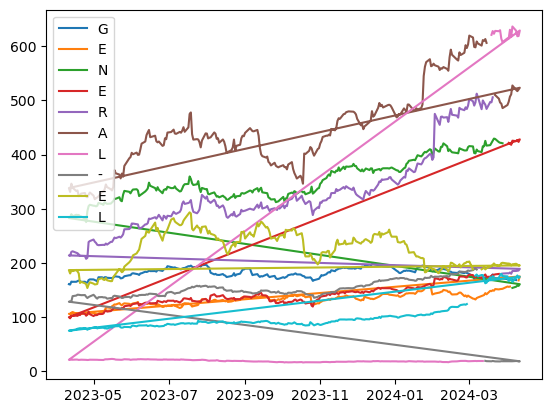

In [54]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [55]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,215.479996,216.020004,213.410004,213.850006,213.623352,16710100,META
2023-04-12,214.839996,216.839996,212.580002,214.000000,213.773178,18972200,META
2023-04-13,215.729996,221.149994,215.690002,220.350006,220.116455,23310400,META
2023-04-14,217.880005,222.110001,217.550003,221.490005,221.255249,21591200,META
2023-04-17,219.789993,220.979996,217.130005,218.860001,218.628036,15481900,META
...,...,...,...,...,...,...,...
2024-04-05,516.859985,530.700012,514.409973,527.340027,527.340027,19242000,META
2024-04-08,529.280029,531.489990,518.890015,519.250000,519.250000,13260600,META
2024-04-09,522.229980,525.869995,506.739990,516.900024,516.900024,10881400,META


In [56]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [57]:
    df_app_c

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [58]:
    dfxfs

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [59]:
    df_g = df_app_c
    df_g

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [60]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [61]:
    dfxfs

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [62]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([213.8500061 , 214.        , 220.3500061 , ..., 516.90002441,
       519.83001709, 523.15997314])

In [63]:
    fcv = np.array(dfxfs['Close'])

In [64]:
    len(fcv)

2530

In [65]:
    mseallfe = np.zeros(len(dfxfs))

In [66]:
    dfxfs[1:4]

,Close
Date,
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007


In [67]:
    for i in range(0,len(dfxfs)):
        mseallfe[i] = fcv[i]-fxv[i]
        

In [68]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

2530

In [69]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

2530

In [70]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [71]:
    len(final_df)

2530

In [72]:
    len(mseallfe)

2530

In [73]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([213.8500061 , 214.        , 220.3500061 , ..., 516.90002441,
       519.83001709, 523.15997314])

In [74]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,213.850006
1,214.000000
2,220.350006
3,221.490005
4,218.860001
...,...
2525,527.340027
2526,519.250000
2527,516.900024
2528,519.830017


In [75]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [76]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

745

In [77]:
    datasetx

,Close
1746,512.190002
1747,505.950012
1748,483.589996
1749,499.750000
1750,495.570007
...,...
2525,527.340027
2526,519.250000
2527,516.900024
2528,519.830017


In [78]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[ 9.05250175e-01],
       [ 8.66224628e-01],
       [ 7.26382768e-01],
       [ 8.27449108e-01],
       [ 8.01307000e-01],
       [ 7.77916522e-01],
       [ 7.29572422e-01],
       [ 8.10125310e-01],
       [ 8.05497143e-01],
       [ 8.63535219e-01],
       [ 8.77544541e-01],
       [ 8.88926865e-01],
       [ 8.47899959e-01],
       [ 8.03308359e-01],
       [ 7.90612346e-01],
       [ 7.38828374e-01],
       [ 7.74914675e-01],
       [ 8.12564311e-01],
       [ 8.71165233e-01],
       [ 8.97307532e-01],
       [ 1.00000000e+00],
       [ 9.49404132e-01],
       [ 9.34707141e-01],
       [ 9.53031619e-01],
       [ 9.73857510e-01],
       [-9.60599127e-01],
       [-9.59661050e-01],
       [-9.19947452e-01],
       [-9.12817778e-01],
       [-9.29266101e-01],
       [-9.35332590e-01],
       [-9.49029092e-01],
       [-9.65477320e-01],
       [-9.66603109e-01],
       [-9.67228557e-01],
       [-1.00000000e+00],
       [-9.88429965e-01],
       [-8.06060276e-01],
       [-7.9

In [79]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([ 0.90525017,  0.86622463,  0.72638277,  0.82744911,  0.801307  ,
        0.77791652,  0.72957242,  0.81012531,  0.80549714,  0.86353522,
        0.87754454,  0.88892686,  0.84789996,  0.80330836,  0.79061235,
        0.73882837,  0.77491467,  0.81256431,  0.87116523,  0.89730753,
        1.        ,  0.94940413,  0.93470714,  0.95303162,  0.97385751,
       -0.96059913, -0.95966105, -0.91994745, -0.91281778, -0.9292661 ,
       -0.93533259, -0.94902909, -0.96547732, -0.96660311, -0.96722856,
       -1.        , -0.98842997, -0.80606028, -0.79505299, -0.77716635,
       -0.80180744, -0.81562905, -0.83758092, -0.84220899, -0.83914444,
       -0.83851909, -0.84033274, -0.82338417, -0.83576727, -0.80418403,
       -0.80443415, -0.7814816 , -0.7542137 , -0.76178121, -0.74502016,
       -0.75490166, -0.73945401, -0.71768976, -0.65921385, -0.656212  ])]
[-0.642452897754956]

[array([ 0.90525017,  0.86622463,  0.72638277,  0.82744911,  0.801307  ,
        0.77791652,  0.72957242,  0.81

In [80]:
    len(x_trainx)

685

In [81]:
    sdx

,Close
0,213.850006
1,214.000000
2,220.350006
3,221.490005
4,218.860001
...,...
2525,527.340027
2526,519.250000
2527,516.900024
2528,519.830017


In [82]:
    x_trainx.shape[0]

685

In [83]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [84]:
    xtrainfinal.shape[0]

2530

In [85]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [86]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [88]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

7/7 [==============================] - 0s 1ms/step - loss: 0.4271


In [89]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [90]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
2491,484.029999
2492,473.320007
2493,471.750000
2494,468.029999
2495,486.130005
2496,484.029999
2497,481.739990
2498,487.049988
2499,484.019989
2500,490.130005


In [91]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [92]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

2/2 [==============================] - 0s 2ms/step


array([[0.19623516],
       [0.20078145],
       [0.19271927],
       [0.21546474],
       [0.20238125],
       [0.13254395],
       [0.02445247],
       [0.07424846],
       [0.05816257],
       [0.0039201 ],
       [0.        ],
       [0.07344427],
       [0.10525637],
       [0.22444603],
       [0.176112  ],
       [0.2888422 ],
       [0.34797722],
       [0.35972703],
       [0.42979923],
       [0.47027606],
       [0.4224918 ],
       [0.3927639 ],
       [0.39750406],
       [0.50708294],
       [0.39023504],
       [0.39514798],
       [0.41417372],
       [0.53859514],
       [0.50485617],
       [0.55658597],
       [0.5600406 ],
       [0.6403009 ],
       [0.56568456],
       [0.55994266],
       [0.58121216],
       [0.5755796 ],
       [0.55100983],
       [0.5795085 ],
       [0.58335173]], dtype=float32)

In [93]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [94]:
    predictionsx

array([[398.82202],
       [399.54898],
       [398.25986],
       [401.89676],
       [399.80478],
       [388.63812],
       [371.35483],
       [379.317  ],
       [376.74493],
       [368.0718 ],
       [367.445  ],
       [379.1884 ],
       [384.27496],
       [403.33282],
       [395.60446],
       [413.62943],
       [423.08487],
       [424.9636 ],
       [436.1678 ],
       [442.6398 ],
       [434.99933],
       [430.24603],
       [431.00394],
       [448.52502],
       [429.84167],
       [430.6272 ],
       [433.66934],
       [453.5637 ],
       [448.169  ],
       [456.44034],
       [456.9927 ],
       [469.82593],
       [457.89514],
       [456.97705],
       [460.37796],
       [459.47733],
       [455.54874],
       [460.10553],
       [460.72006]], dtype=float32)

In [95]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

2530

In [96]:
    data

0       213.850006
1       214.000000
2       220.350006
3       221.490005
4       218.860001
           ...    
2525    527.340027
2526    519.250000
2527    516.900024
2528    519.830017
2529    523.159973
Name: Close, Length: 2530, dtype: float64

In [97]:
    datax = pd.DataFrame(data)
    datax

,Close
0,213.850006
1,214.000000
2,220.350006
3,221.490005
4,218.860001
...,...
2525,527.340027
2526,519.250000
2527,516.900024
2528,519.830017


In [98]:
    datax

,Close
0,213.850006
1,214.000000
2,220.350006
3,221.490005
4,218.860001
...,...
2525,527.340027
2526,519.250000
2527,516.900024
2528,519.830017


In [99]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[213.8500061  214.         220.3500061  221.49000549 218.86000061
 217.88999939 215.69999695 213.07000732 212.88999939 212.78999329
 207.55000305 209.3999939  238.55999756 240.32000732 243.17999268
 239.24000549 237.02999878 233.52000427 232.77999878 233.27000427
 233.36999512 233.08000183 235.78999329 233.80999756 238.86000061
 238.82000732 242.49000549 246.8500061  245.63999939 248.32000732
 246.74000549 249.21000671 252.69000244 262.04000854 262.51998901
 264.72000122 272.60998535 272.60998535 271.39001465]


In [100]:
    valid = pd.DataFrame()

In [101]:
    valid

""


In [102]:
    np.array(data)

array([213.8500061 , 214.        , 220.3500061 , ..., 516.90002441,
       519.83001709, 523.15997314])

In [103]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [104]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [105]:
    valid

,predictions,close app
0,212.406067,213.850006
1,212.577423,214.000000
2,218.227997,220.350006
3,219.435822,221.490005
4,216.964233,218.860001
5,215.532898,217.889999
6,212.697723,215.699997
7,210.728851,213.070007
8,210.438232,212.889999
9,209.914551,212.789993


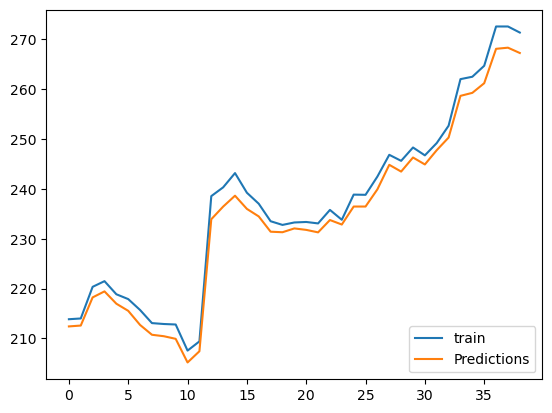

[[1.20164022 1.26251064 2.81849946 ... 7.75911841 7.75911841 7.68010076]
 [1.12808821 1.19271828 2.78793526 ... 7.74806829 7.74806829 7.66893679]
 [2.09236486 2.05620933 1.4567118  ... 7.37441445 7.37441445 7.29122883]
 ...
 [7.36725171 7.35706489 6.91204729 ... 2.11744694 2.11744694 1.80654666]
 [7.38269883 7.37253335 6.92850936 ... 2.06294384 2.06294384 1.74234514]
 [7.31006236 7.29979574 6.85105917 ... 2.30715572 2.30715572 2.02558555]]


In [115]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)
    

In [117]:
error_main.shape

(39, 39)

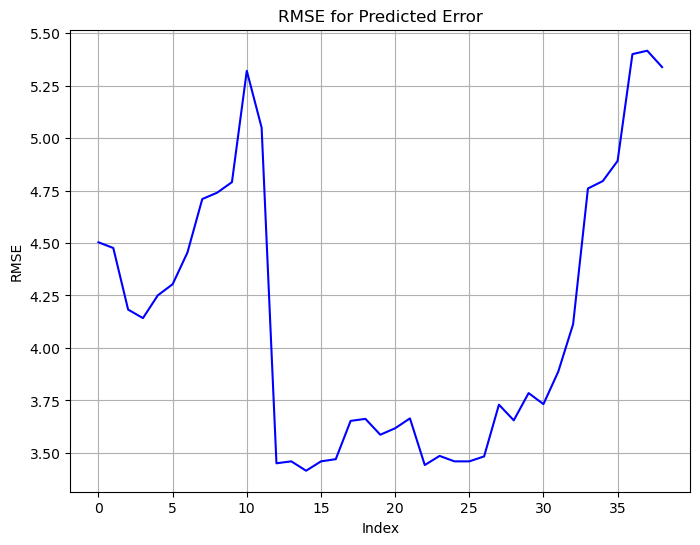

In [119]:
error = np.mean(error_main, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(39), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [108]:
final_pred

array([212.40606689, 212.5774231 , 218.22799683, 219.43582153,
       216.9642334 , 215.53289795, 212.69772339, 210.72885132,
       210.43823242, 209.91455078, 205.16725159, 207.41937256,
       233.91770935, 236.45458984, 238.64221191, 235.99749756,
       234.48120117, 231.4161377 , 231.31036377, 232.07495117,
       231.78292847, 231.28427124, 233.76116943, 232.85522461,
       236.46606445, 236.46929932, 239.92440796, 244.84317017,
       243.484375  , 246.30996704, 244.9156189 , 247.78027344,
       250.31573486, 258.68481445, 259.28692627, 261.22186279,
       268.12640381, 268.35424805, 267.28701782])